# Machine Learning session 3 

## Exploring the Dataset

In [1]:
#import necessary libraries
import pandas as pd # for dataframes
import numpy as np # for arrays
import seaborn as sns # for fancy plots
import matplotlib.pyplot as plt # as usual for plots
import sklearn
import os
plt.style.use("dark_background")

C:\Users\Chris\anaconda3a\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#load the dataset
url = "https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Programming_Sessions/Programming_session_3/credit_dataset.csv"

df = pd.read_csv(url, index_col = 0)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,65000,RENT,8.0,VENTURE,E,15000,16.32,1,0.23,Y,4
1,27,72000,RENT,3.0,DEBTCONSOLIDATION,D,25000,15.95,1,0.35,Y,6
2,21,28800,MORTGAGE,0.0,DEBTCONSOLIDATION,A,5000,7.49,0,0.17,N,3
3,30,90000,RENT,14.0,PERSONAL,D,10000,15.62,0,0.11,Y,6
4,30,61000,MORTGAGE,4.0,PERSONAL,A,4500,6.54,0,0.07,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,31,95000,MORTGAGE,5.0,VENTURE,B,18000,11.71,0,0.19,N,9
32577,29,158000,OWN,13.0,EDUCATION,A,11000,8.49,0,0.07,N,6
32578,37,42000,RENT,0.0,MEDICAL,A,12000,10.99,0,0.29,N,13
32579,25,60000,RENT,4.0,PERSONAL,A,9800,10.99,0,0.16,N,3


In [3]:
df.tail(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,31,95000,MORTGAGE,5.0,VENTURE,B,18000,11.71,0,0.19,N,9
32577,29,158000,OWN,13.0,EDUCATION,A,11000,8.49,0,0.07,N,6
32578,37,42000,RENT,0.0,MEDICAL,A,12000,10.99,0,0.29,N,13
32579,25,60000,RENT,4.0,PERSONAL,A,9800,10.99,0,0.16,N,3
32580,31,30000,RENT,5.0,EDUCATION,A,6000,8.49,0,0.20,N,7


In [4]:
#create quickaccess list with categorical variables labels
catvars = list(df.select_dtypes(include = 'object').columns)
#create quickaccess list with numerical variables labels
numvars = list(df.select_dtypes(exclude = 'object').columns)
numvars.remove("loan_status")

In [5]:
# Threshold
threshold = 0.7*len(df)

# Splitting the dataset
df_train = df.loc[:threshold].reset_index(drop=True)
df_test = df.loc[threshold:].reset_index(drop=True)

In [6]:
print("We have {} training samples".format(len(df_train)))
print("We have {} testing samples".format(len(df_test)))

We have 22807 training samples
We have 9774 testing samples


In [7]:
#create a new categorical value
# Age intervals
intervals = (0, 39000, 55000, 79000, 6000000)
# Categories
categories = ["D", "C", "B", "A"]
# Create the new feature
df_train["category_income"] = pd.cut(df_train.person_income, intervals, labels=categories)
df_test["category_income"] = pd.cut(df_test.person_income, intervals, labels=categories)

catvars.append("category_income")

## Visualization

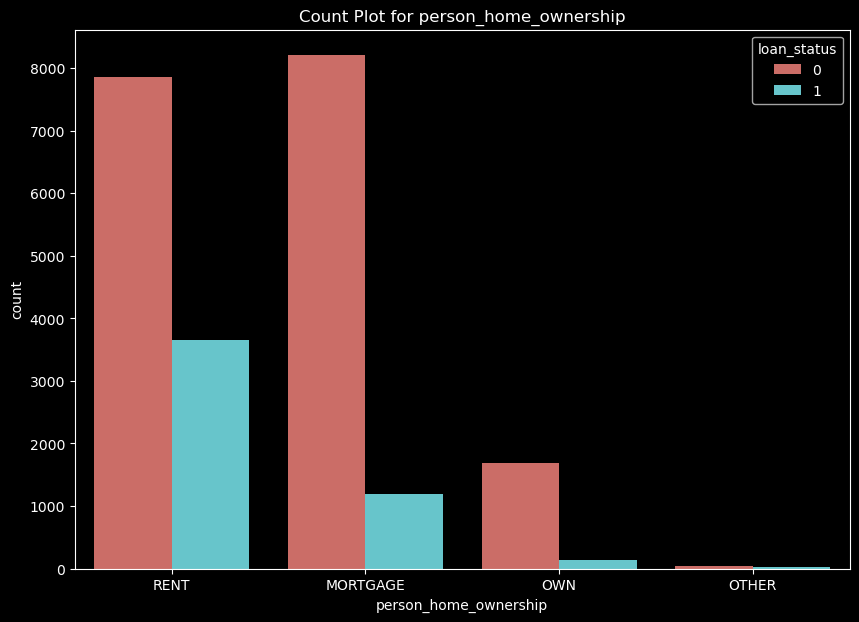

In [8]:
#visualize the distribution of the "person ownership" in terms of the loan status
fig = plt.figure(figsize=(10, 7))
g = sns.countplot(x="person_home_ownership", data=df_train, palette="hls", hue="loan_status")
g.set_title("Count Plot for person_home_ownership")
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_20208\3908468930.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train[df_train["loan_status"]==0]["person_income"], color="g")
C:\Users\Chris\anaconda3a\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Chris\AppData\Local\Temp\ipykernel_20208\3908468930.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

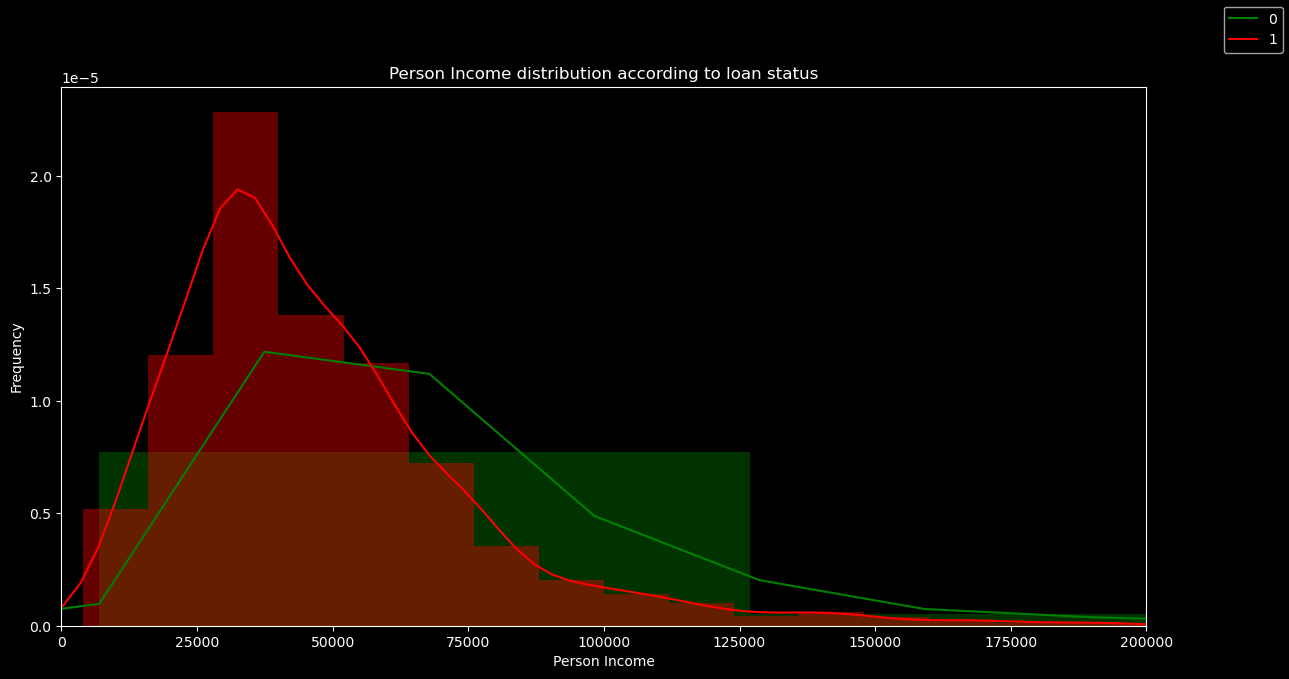

In [9]:
#Display the distribution of the 'person income' variable for the "0" and "1" targets

fig = plt.figure(figsize=(14, 7))
g = sns.distplot(df_train[df_train["loan_status"]==0]["person_income"], color="g")
g = sns.distplot(df_train[df_train["loan_status"]==1]["person_income"], color="r")
g.set_xlabel("Person Income")
g.set(xlim=(0, 200000))
g.set_ylabel("Frequency")
g.set_title("Person Income distribution according to loan status")
fig.legend(labels=["0", "1"])
plt.show()

C:\Users\Chris\anaconda3a\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Chris\anaconda3a\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


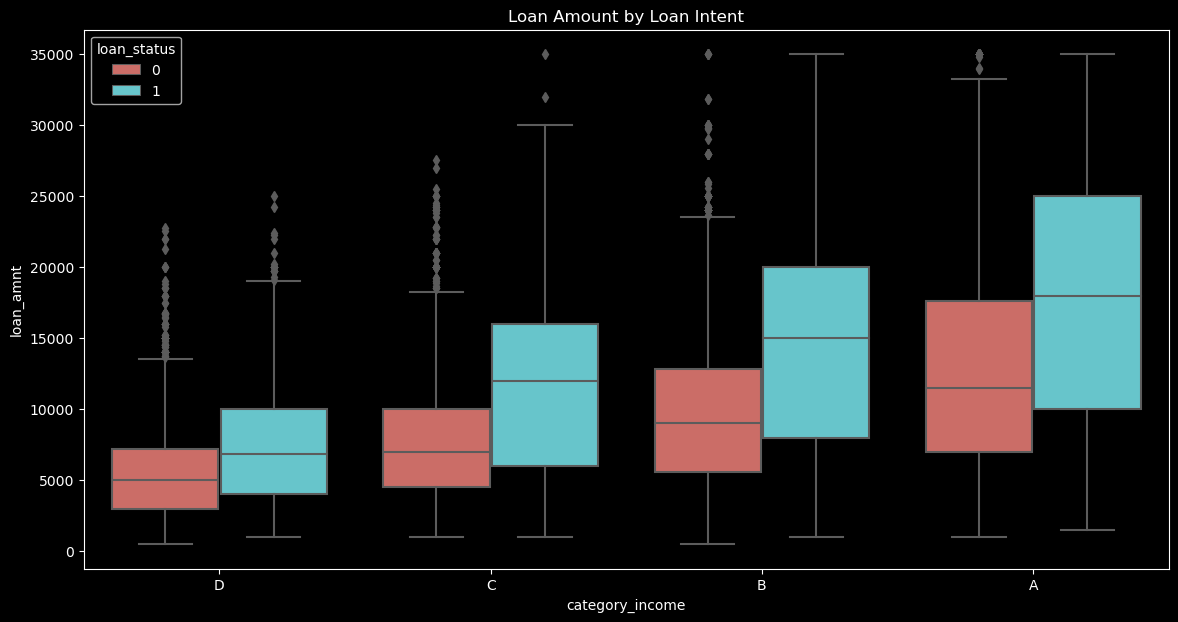

In [10]:
#Describe the distribution of of the numerical feature "loan amaount" according to the categorical value "category income"
fig = plt.figure(figsize=(14, 7))
g = sns.boxplot(x="category_income", y="loan_amnt", data=df_train, palette="hls",hue="loan_status")
g.set_title("Loan Amount by Loan Intent")
plt.show()

## Preprocessing the data

In [11]:
for categorical_variable in catvars:
  print("Feature: {} ... Categories: {}".format(categorical_variable, df_train[categorical_variable].unique()))

Feature: person_home_ownership ... Categories: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
Feature: loan_intent ... Categories: ['VENTURE' 'DEBTCONSOLIDATION' 'PERSONAL' 'EDUCATION' 'MEDICAL'
 'HOMEIMPROVEMENT']
Feature: loan_grade ... Categories: ['E' 'D' 'A' 'F' 'C' 'B' 'G']
Feature: cb_person_default_on_file ... Categories: ['Y' 'N']
Feature: category_income ... Categories: ['B', 'D', 'A', 'C']
Categories (4, object): ['D' < 'C' < 'B' < 'A']


In [12]:
#Transform each categorical variable, which has K categories, into K-1 new feature columns by employing either pandas.get_dummies or sklearn.preprocessing.OneHotEncoder, ensuring to drop one category to avoid multicollinearity

In [13]:
df_train = pd.get_dummies(df_train,
                          columns=catvars,
                          dummy_na=False,
                          drop_first=True)

In [14]:
df_test = pd.get_dummies(df_test,
                         columns=catvars,
                         dummy_na=False,
                         drop_first=True)

In [15]:
#Preprocess numerical values
df_train_targets = df_train['loan_status']
df_train_features = df_train.drop('loan_status',axis=1)

df_test_targets = df_test['loan_status']
df_test_features = df_test.drop('loan_status',axis=1)


In [16]:
#defining the training and test dataset
X_train = df_train_features.values
X_test = df_test_features.values

y_train = df_train_targets.values
y_test = df_test_targets.values

## Fine tuning

<Axes: >

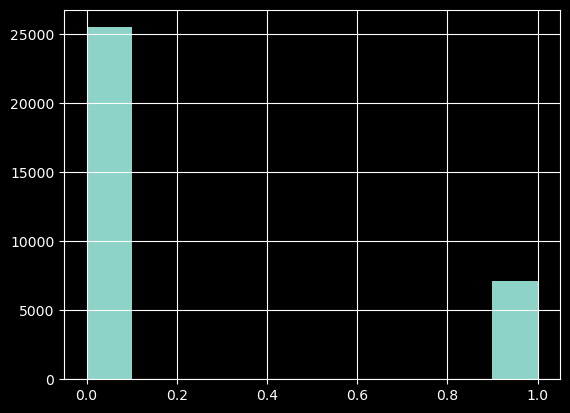

In [17]:
df["loan_status"].hist() #we have an imbalanced dataset

In [18]:
#Create a function that will plot the confusion matrix of our model
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_hat):
  fig = plt.figure(figsize=(10, 8))
  g = sns.heatmap(confusion_matrix(y_test, y_hat),
              annot=True,
              fmt="0.0f")
    
  g.set_xlabel("Predicted")
  g.set_ylabel("Actual")
  g.set_title("Confusion Matrix on the test set")
  plt.show()

In [19]:
#define the hyperparameters that our model will have to tune and give specific value to choose

from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['sqrt'],
 'n_estimators': [200, 250, 300, 350, 400]}


In [20]:
# Import Modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_rf,
                               param_distributions = random_grid,
                               n_iter = 5,
                               cv = 3,
                               verbose=2,
                               scoring="f1",
                               random_state=42,
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=42, scoring='f1', verbose=2)

In [22]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=85, n_estimators=200,
                       random_state=42)

In [23]:
#develop the model with the optimal hyper parameters
rf_best = rf_random.best_estimator_

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7676
           1       0.96      0.74      0.83      2098

    accuracy                           0.94      9774
   macro avg       0.94      0.86      0.90      9774
weighted avg       0.94      0.94      0.93      9774



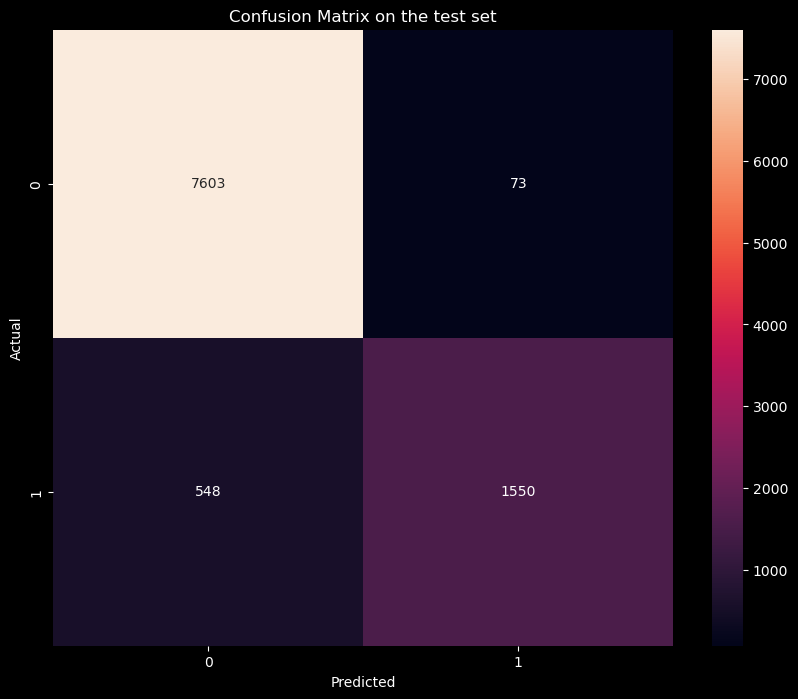

In [24]:
# Evaluation performances
from sklearn.metrics import classification_report
y_hat = rf_best.predict(X_test)
print(classification_report(y_test, y_hat))
# Confusion Matrix
plot_confusion_matrix(y_test, y_hat)

In [25]:
#Further applications may involve implementing resampling techniques in order to create a balanced dataset